In [2]:
import os

In [3]:
!python -m ensurepip --default-pip && python -m pip install pillow scikit-learn matplotlib numpy jupyter rembg onnxruntime -q

Looking in links: /var/folders/np/sw3cwd7x6rv0llrv26d2w1s40000gn/T/tmpr9wu09y7

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# data_path = os.path.abspath(os.path.join("artifacts", "data"))
data_path = os.path.join("..", "artifacts", "images")
data_path

'../artifacts/images'

In [5]:
img = ("dress", "3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))

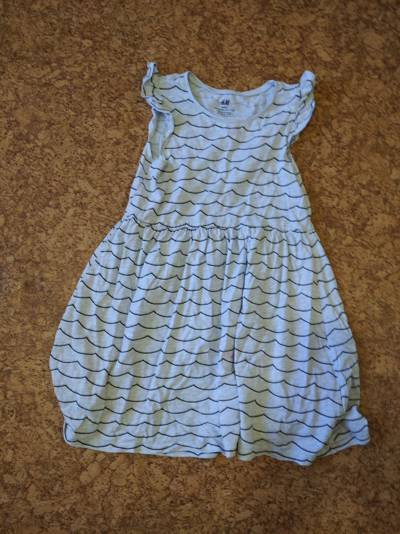

In [6]:
from PIL import Image
image = Image.open(image_path)
image 

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def display_palette(palette):
    fig, ax1  = plt.subplots(1, 1) 
    
    palette_height = 1
    palette_width = 10
    palette_img = np.zeros((palette_height, palette_width, 3), dtype=np.uint8)
    
    x_start = 0
    for i, (color, percentage) in enumerate(palette):
        if i == len(palette) - 1:
            section_width = palette_width - x_start
        else:
            section_width = int(palette_width * percentage / 100)
        
        palette_img[:, x_start:x_start + section_width] = color
        x_start += section_width
    
    ax1.imshow(palette_img)
    ax1.set_title('Color Palette')
    ax1.axis('off')
    plt.show()

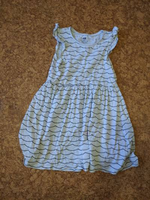

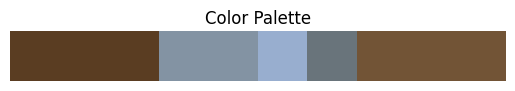

In [31]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

def extract_color_palette_from_image(image, n_colors=5, resize_width=150):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    original_width, original_height = image.size
    aspect_ratio = original_height / original_width
    resize_height = int(resize_width * aspect_ratio)
    image = image.resize((resize_width, resize_height), Image.Resampling.LANCZOS)
    display(image)
    
    pixels = np.array(image).reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    
    color_counts = Counter(labels)
    color_percentages = [(count / len(labels)) * 100 for count in color_counts.values()]
    
    palette = list(zip(colors, color_percentages))
    palette.sort(key=lambda x: x[1], reverse=True)
    
    return palette

img = ("dress", "3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
display_palette(extract_color_palette_from_image(image, n_colors=5, resize_width=150))

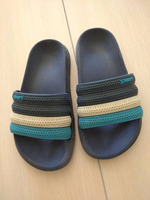

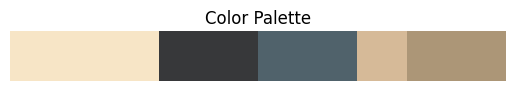

In [32]:
img = ("shoes", "5d147b66-5238-4ed0-9c6f-c68286fea4ad.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
display_palette(extract_color_palette_from_image(image, n_colors=5, resize_width=150))

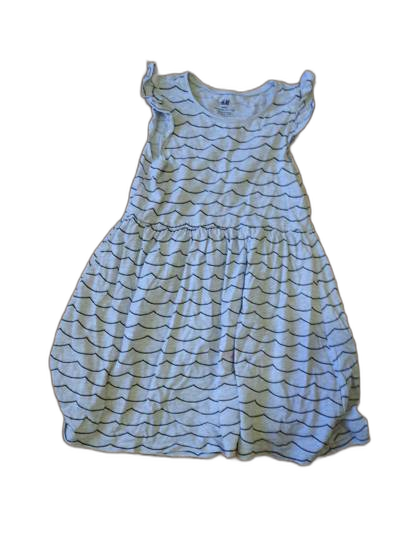

In [33]:
from rembg import remove
from PIL import Image

img = ("dress", "3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
image_removed_background = remove(image)
display(image_removed_background)

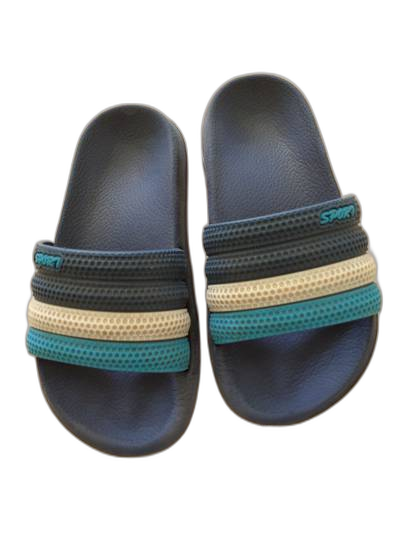

In [34]:
img = ("shoes", "5d147b66-5238-4ed0-9c6f-c68286fea4ad.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
image_removed_background = remove(image)
display(image_removed_background)

### New clustering method for flexible amount of clusters

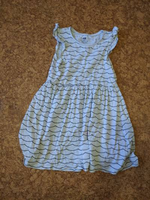

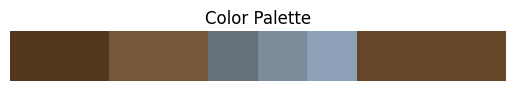

In [35]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter

def new_extract_method(image, resize_width=150):
    if image.mode != 'RGB':
            image = image.convert('RGB')

    original_width, original_height = image.size
    aspect_ratio = original_height / original_width
    resize_height = int(resize_width * aspect_ratio)
    image = image.resize((resize_width, resize_height), Image.Resampling.LANCZOS)
    display(image)

    pixels = np.array(image).reshape(-1, 3)

    scaler = StandardScaler()
    pixels_scaled = scaler.fit_transform(pixels)

    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=50,
        linkage='ward'
    )
    labels = clustering.fit_predict(pixels_scaled)

    unique_labels = np.unique(labels)
    colors = np.array([pixels[labels == label].mean(axis=0) for label in unique_labels]).astype(int)


    color_counts = Counter(labels)
    color_percentages = [(count / len(labels)) * 100 for count in color_counts.values()]

    palette = list(zip(colors, color_percentages))
    palette.sort(key=lambda x: x[1], reverse=True)
    return palette

img = ("dress", "3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
display_palette(new_extract_method(image))

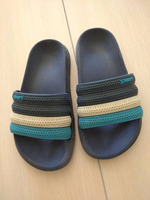

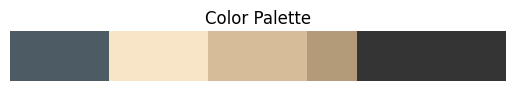

In [36]:
img = ("shoes", "5d147b66-5238-4ed0-9c6f-c68286fea4ad.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
display_palette(new_extract_method(image))

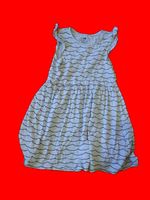

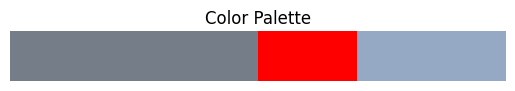

In [37]:
img = ("dress", "3f844e1e-4a00-4b64-8c1d-3b847191bf11.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
image_removed_background = remove(image, bgcolor=(255, 0, 0))
display_palette(new_extract_method(image_removed_background))

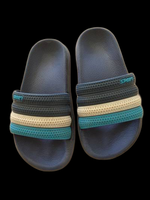

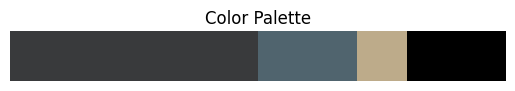

In [38]:
img = ("shoes", "5d147b66-5238-4ed0-9c6f-c68286fea4ad.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
image_removed_background = remove(image)
display_palette(new_extract_method(image_removed_background))

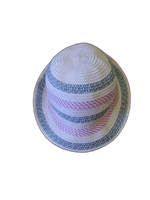

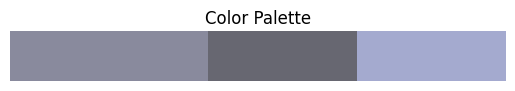

In [ ]:
def new_extract_method_including_bg_removal(image, resize_width=150, alpha_threshold=128):
    image = remove(image)

    if image.mode != 'RGBA':
        image = image.convert('RGBA')

    original_width, original_height = image.size
    aspect_ratio = original_height / original_width
    resize_height = int(resize_width * aspect_ratio)
    image = image.resize((resize_width, resize_height), Image.Resampling.LANCZOS)
    display(image)

    pixels_rgba = np.array(image).reshape(-1, 4)
    
    # Getting the correct htreshold
    foreground_mask = pixels_rgba[:, 3] > alpha_threshold

    if not np.any(foreground_mask):
        print("Warning: No foreground pixels found. Lowering alpha threshold.")
        foreground_mask = pixels_rgba[:, 3] > 64  # Fallback threshold
        
    if not np.any(foreground_mask):
        print("Warning: Still no foreground pixels found. Using all non-zero alpha pixels.")
        foreground_mask = pixels_rgba[:, 3] > 0

    pixels = pixels_rgba[foreground_mask][:, :3]

    scaler = StandardScaler()
    pixels_scaled = scaler.fit_transform(pixels)

    clustering = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=50,
        linkage='ward'
    )
    labels = clustering.fit_predict(pixels_scaled)

    unique_labels = np.unique(labels)
    colors = np.array([pixels[labels == label].mean(axis=0) for label in unique_labels]).astype(int)

    color_counts = Counter(labels)
    color_percentages = [(count / len(labels)) * 100 for count in color_counts.values()]

    palette = list(zip(colors, color_percentages))
    palette.sort(key=lambda x: x[1], reverse=True)
    return palette

img = ("hat", "ff62e59f-c949-4f8e-8fca-798ab3e174c5.jpg")
image_path = os.path.abspath(os.path.join(data_path, *img))
image = Image.open(image_path)
display_palette(new_extract_method_including_bg_removal(image))

### Check on all images

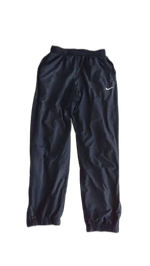

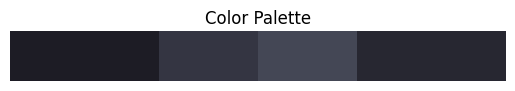

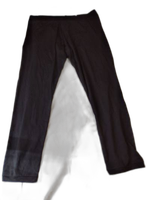

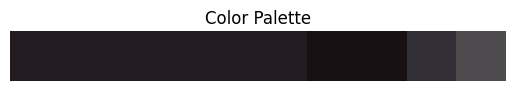

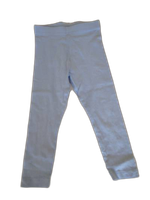

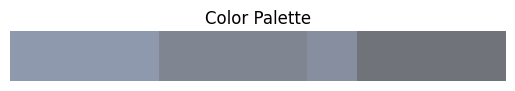

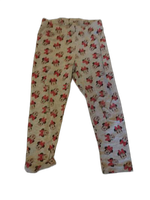

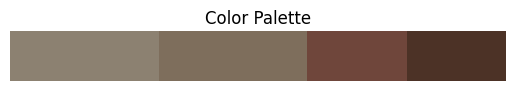

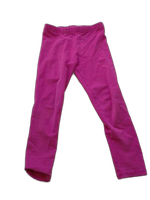

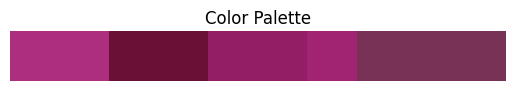

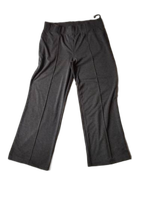

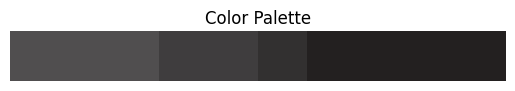

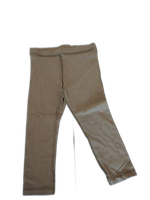

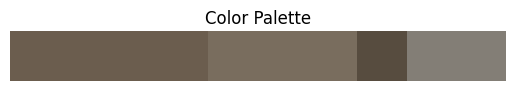

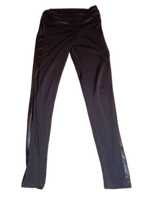

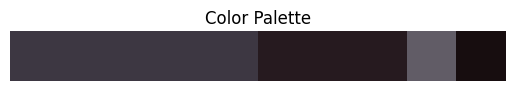

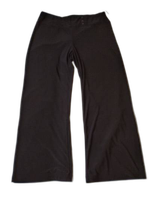

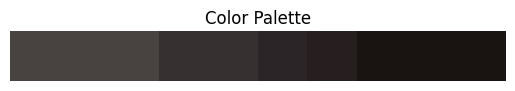

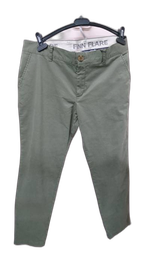

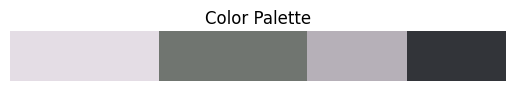

In [43]:
import glob

category_name = "pants"
folder_path = os.path.abspath(os.path.join(data_path, category_name))
file_names = glob.glob(os.path.join(folder_path, "*.jpg"))
                                           
start_idx = 0
end_idx = 10

for file_name in file_names[start_idx: end_idx]:
    image = Image.open(file_name)
    display_palette(new_extract_method_including_bg_removal(image))

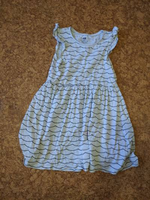

[{'rank': 1,
  'rgb': (np.int64(101), np.int64(73), np.int64(44)),
  'hex': '#65492c',
  'percentage': 60.1},
 {'rank': 2,
  'rgb': (np.int64(116), np.int64(129), np.int64(140)),
  'hex': '#74818c',
  'percentage': 21.2},
 {'rank': 3,
  'rgb': (np.int64(147), np.int64(168), np.int64(197)),
  'hex': '#93a8c5',
  'percentage': 18.7}]

In [ ]:
# def get_color_palette_info(image_path, n_colors=5):
#     palette = extract_color_palette(image_path, n_colors)
    
#     result = []
#     for i, (color, percentage) in enumerate(palette):
#         color_info = {
#             'rank': i + 1,
#             'rgb': tuple(color),
#             'hex': rgb_to_hex(color),
#             'percentage': round(percentage, 1)
#         }
#         result.append(color_info)
    
#     return result

# color_palette_info = get_color_palette_info(image_path, n_colors=3)
# color_palette_info

Found 26 JPG files in the folder.


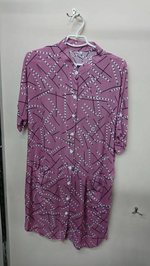

Color 1: RGB(np.int64(124), np.int64(90), np.int64(115)) - 29.9%
Color 2: RGB(np.int64(144), np.int64(140), np.int64(141)) - 26.7%
Color 3: RGB(np.int64(190), np.int64(190), np.int64(188)) - 24.7%
Color 4: RGB(np.int64(82), np.int64(51), np.int64(73)) - 18.7%


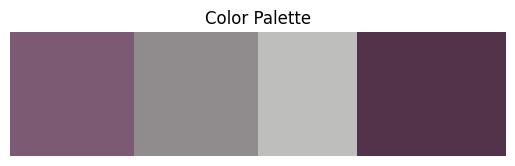

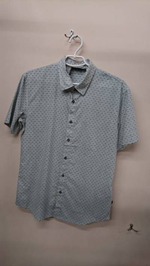

Color 1: RGB(np.int64(114), np.int64(109), np.int64(109)) - 33.8%
Color 2: RGB(np.int64(135), np.int64(132), np.int64(132)) - 28.5%
Color 3: RGB(np.int64(87), np.int64(85), np.int64(84)) - 22.6%
Color 4: RGB(np.int64(179), np.int64(165), np.int64(159)) - 15.1%


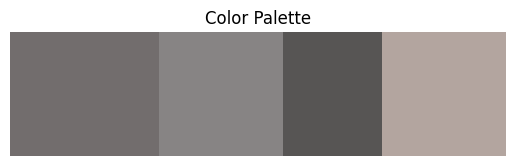

In [14]:
n_colors_to_extract = 4
max_images = 2

category = "shirt"

jpg_files = get_jpg_files(f'{data_path}/{category}')
print(f"Found {len(jpg_files)} JPG files in the folder.")

max_display = min(max_images, len(jpg_files))

for single_img in jpg_files[:max_display]:
    single_img_path = os.path.join(data_path, category, single_img)
    palette = extract_color_palette(single_img_path, n_colors=n_colors_to_extract)
    display_palette(palette)

Found 72 JPG files in the folder.


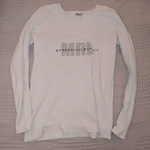

Color 1: RGB(np.int64(132), np.int64(115), np.int64(110)) - 32.3%
Color 2: RGB(np.int64(176), np.int64(163), np.int64(159)) - 26.1%
Color 3: RGB(np.int64(149), np.int64(132), np.int64(129)) - 21.7%
Color 4: RGB(np.int64(188), np.int64(175), np.int64(172)) - 19.8%


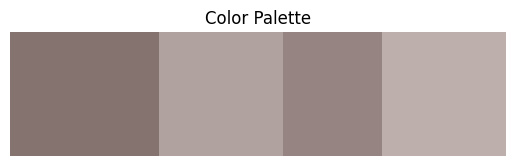

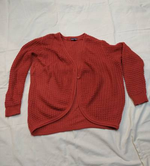

Color 1: RGB(np.int64(160), np.int64(151), np.int64(146)) - 43.7%
Color 2: RGB(np.int64(206), np.int64(202), np.int64(196)) - 26.8%
Color 3: RGB(np.int64(136), np.int64(41), np.int64(36)) - 23.8%
Color 4: RGB(np.int64(184), np.int64(180), np.int64(174)) - 5.7%


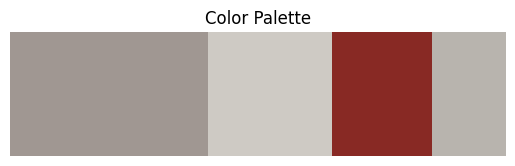

In [15]:
n_colors_to_extract = 4
max_images = 2

category = "longsleeve"

jpg_files = get_jpg_files(f'{data_path}/{category}')
print(f"Found {len(jpg_files)} JPG files in the folder.")

max_display = min(max_images, len(jpg_files))

for single_img in jpg_files[:max_display]:
    single_img_path = os.path.join(data_path, category, single_img)
    palette = extract_color_palette(single_img_path, n_colors=n_colors_to_extract)
    display_palette(palette)

Found 52 JPG files in the folder.


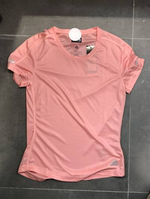

Color 1: RGB(np.int64(209), np.int64(135), np.int64(131)) - 32.7%
Color 2: RGB(np.int64(67), np.int64(64), np.int64(59)) - 29.4%
Color 3: RGB(np.int64(119), np.int64(112), np.int64(107)) - 19.1%
Color 4: RGB(np.int64(235), np.int64(160), np.int64(156)) - 18.8%


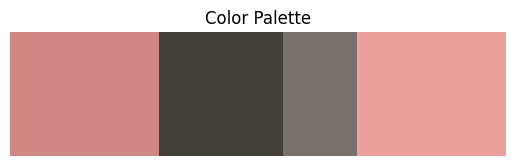

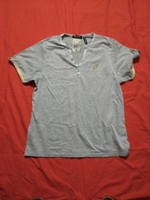

Color 1: RGB(np.int64(183), np.int64(59), np.int64(46)) - 32.0%
Color 2: RGB(np.int64(131), np.int64(130), np.int64(125)) - 27.9%
Color 3: RGB(np.int64(138), np.int64(37), np.int64(31)) - 25.0%
Color 4: RGB(np.int64(160), np.int64(161), np.int64(156)) - 15.1%


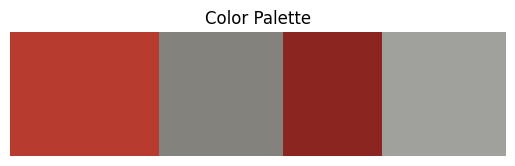

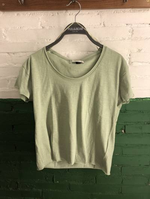

Color 1: RGB(np.int64(86), np.int64(87), np.int64(59)) - 29.7%
Color 2: RGB(np.int64(168), np.int64(161), np.int64(127)) - 25.5%
Color 3: RGB(np.int64(226), np.int64(210), np.int64(184)) - 24.1%
Color 4: RGB(np.int64(26), np.int64(35), np.int64(19)) - 20.7%


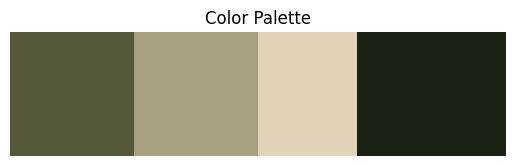

In [16]:
n_colors_to_extract = 4
max_images = 3

category = "t-shirt"

jpg_files = get_jpg_files(f'{data_path}/{category}')
print(f"Found {len(jpg_files)} JPG files in the folder.")

max_display = min(max_images, len(jpg_files))

for single_img in jpg_files[:max_display]:
    single_img_path = os.path.join(data_path, category, single_img)
    palette = extract_color_palette(single_img_path, n_colors=n_colors_to_extract)
    display_palette(palette)